# Experiments with dataset from Raspberry Turk project

http://www.raspberryturk.com/details/vision/data_collection.html

In [4]:
# from IPython.display import Image, display
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib as mpl

import cv2

mpl.rcParams['figure.figsize'] = (10,10)

In [5]:
!ls ../data/raw

1		1481231867.jpg	1481324317.jpg	1481333985.jpg	1481340180.jpg
1481228945.jpg	1481231873.jpg	1481324345.jpg	1481333998.jpg	1481398447.jpg
1481228981.jpg	1481231931.jpg	1481324351.jpg	1481334042.jpg	1481398458.jpg
1481229018.jpg	1481231938.jpg	1481324404.jpg	1481334060.jpg	1481398496.jpg
1481229043.jpg	1481232092.jpg	1481324417.jpg	1481334197.jpg	1481398505.jpg
1481229522.jpg	1481232099.jpg	1481324450.jpg	1481334209.jpg	1481398680.jpg
1481229553.jpg	1481232241.jpg	1481324461.jpg	1481334348.jpg	1481398691.jpg
1481229599.jpg	1481232248.jpg	1481324589.jpg	1481334357.jpg	1481398743.jpg
1481229638.jpg	1481232284.jpg	1481324598.jpg	1481334422.jpg	1481398754.jpg
1481229727.jpg	1481232291.jpg	1481324664.jpg	1481334429.jpg	1481399546.jpg
1481229774.jpg	1481248783.jpg	1481324672.jpg	1481334505.jpg	1481399557.jpg
1481229801.jpg	1481248803.jpg	1481324721.jpg	1481334514.jpg	1481399591.jpg
1481229808.jpg	1481248957.jpg	1481324728.jpg	1481334591.jpg	1481399599.jpg
1481229870.jpg	1481254731.jpg	1481324

In [6]:
data_path = '../data/raw/'

In [7]:
images = glob.glob(data_path + "*.jpg")

In [8]:
len(images)

312

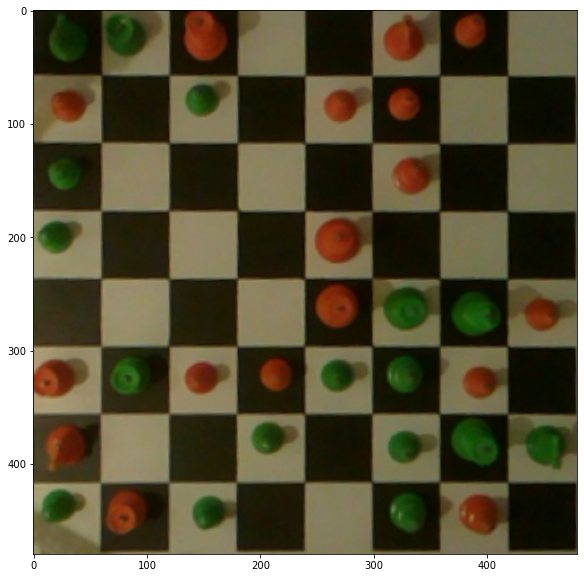

In [6]:
plt.imshow(Image.open(images[0]))

In [12]:
!ls $data_path/1/0

1481228945.jpg	1481228981.jpg	1481229018.jpg	1481229043.jpg	board.fen


## Explore subfolders

In [14]:
def img_reshape(img):
    img.convert('RGB')
#     img = img.resize((300,300))
    img = np.asarray(img)
    return img

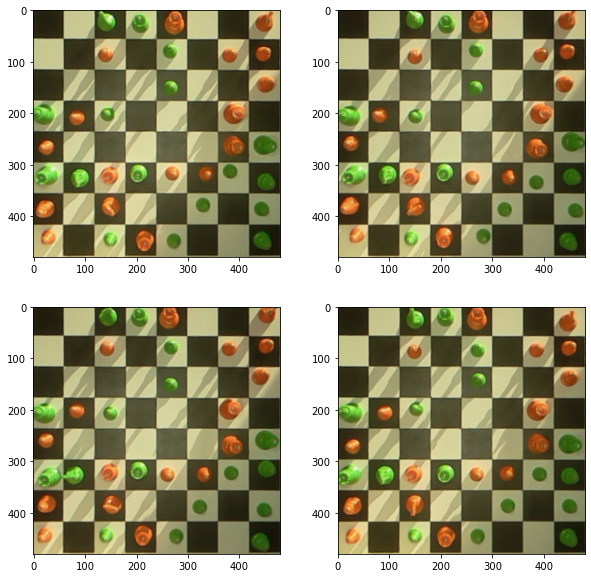

In [15]:
imgs = glob.glob(data_path + "1/0/*.jpg")
ax1 = plt.subplot(2, 2, 1)
for i, img in enumerate(imgs):
    im = img_reshape(Image.open(img))
    ax = plt.subplot(2,2,i+1)
    ax.imshow(im)

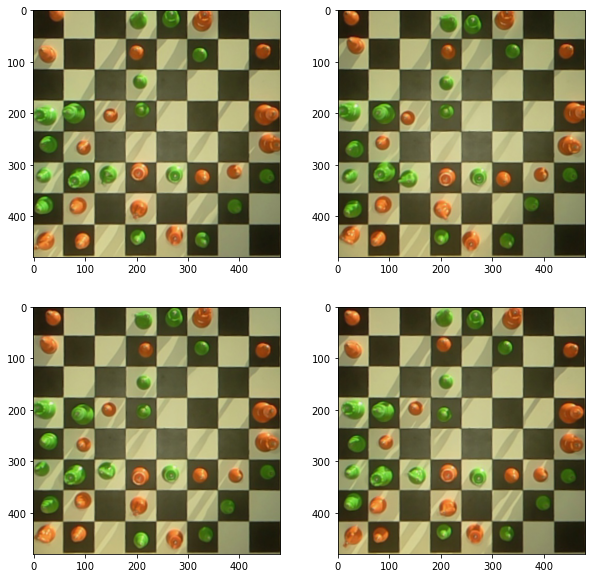

In [16]:
imgs = glob.glob(data_path + "1/1/*.jpg")
ax1 = plt.subplot(2, 2, 1)
for i, img in enumerate(imgs):
    im = img_reshape(Image.open(img))
    ax = plt.subplot(2,2,i+1)
    ax.imshow(im)

8


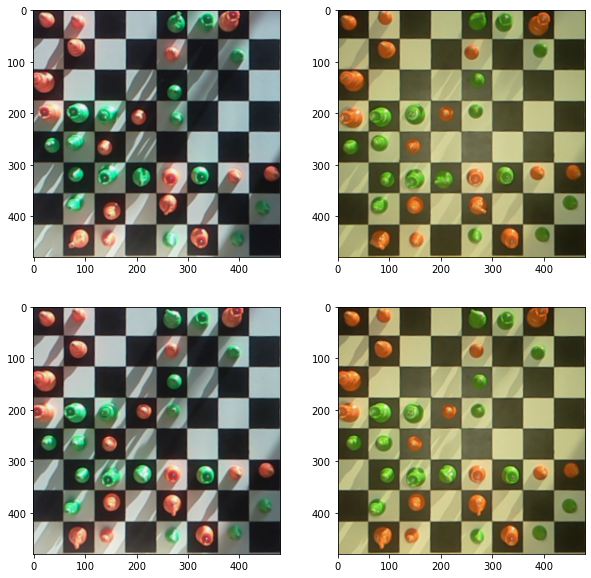

In [17]:
imgs = glob.glob(data_path + "1/2/*.jpg")
ax1 = plt.subplot(2, 2, 1)
for i, img in enumerate(imgs):
    if i >= 4:
        print(len(imgs))
        break 
    im = img_reshape(Image.open(img))
    ax = plt.subplot(2,2,i+1)
    ax.imshow(im)

8


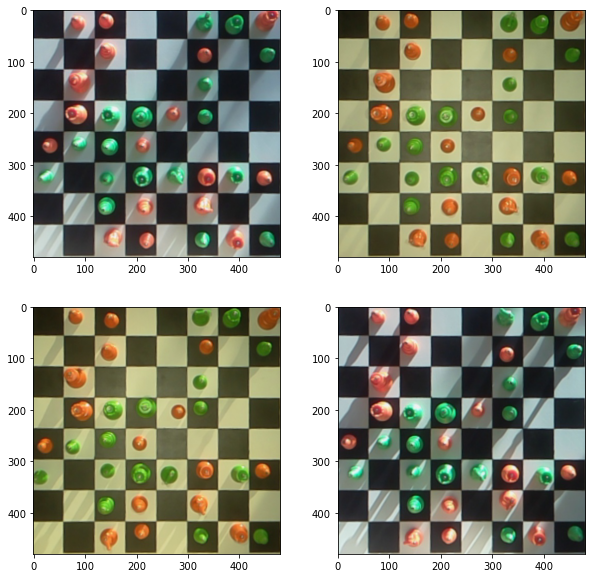

In [12]:
imgs = glob.glob(data_path + "1/3/*.jpg")
ax1 = plt.subplot(2, 2, 1)
for i, img in enumerate(imgs):
    if i >= 4:
        print(len(imgs))
        break 
    im = img_reshape(Image.open(img))
    ax = plt.subplot(2,2,i+1)
    ax.imshow(im)

8


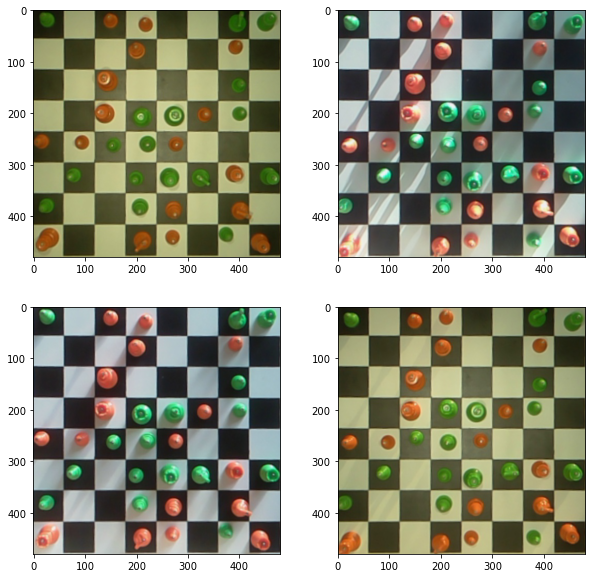

In [13]:
imgs = glob.glob(data_path + "1/4/*.jpg")
ax1 = plt.subplot(2, 2, 1)
for i, img in enumerate(imgs):
    if i >= 4:
        print(len(imgs))
        break 
    im = img_reshape(Image.open(img))
    ax = plt.subplot(2,2,i+1)
    ax.imshow(im)

## Use CV to get each square

In [18]:
!ls $data_path/1/4/*.jpg

../data/raw//1/4/1481230483.jpg  ../data/raw//1/4/1481230585.jpg
../data/raw//1/4/1481230492.jpg  ../data/raw//1/4/1481230592.jpg
../data/raw//1/4/1481230544.jpg  ../data/raw//1/4/1481230627.jpg
../data/raw//1/4/1481230550.jpg  ../data/raw//1/4/1481230635.jpg


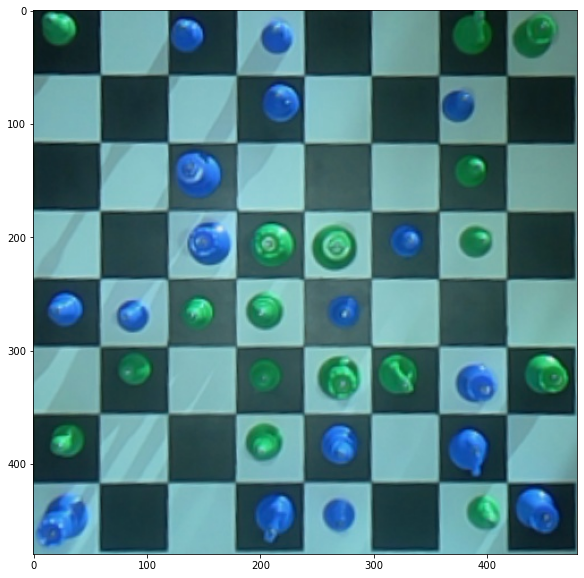

In [20]:
img = cv2.imread(data_path + "1/4/1481230483.jpg")
plt.imshow(img)

In [21]:
squaresize = int(img.shape[0] / 8)

In [22]:
squaresize

60

0 0


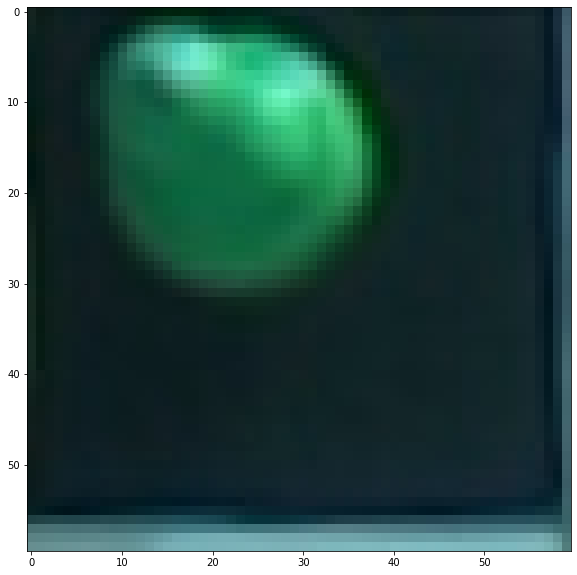

In [23]:
for i in range(8):
    for j in range(8):
        print(i,j)
        istart = i*squaresize
        iend = (i+1)*squaresize
        plt.imshow(img[istart:iend,j*squaresize:(j+1)*squaresize,:])
        plt.show()
        break
    break

### Get board state from FEN

In [25]:
!ls $data_path/1/0

1481228945.jpg	1481228981.jpg	1481229018.jpg	1481229043.jpg	board.fen


In [26]:
with open(data_path + '1/4/board.fen', 'r') as file:
    data = file.read().replace('\n', '')

In [27]:
data

'p1PP2nr/3B2P1/2K3p1/2QqkPp1/PPpbP3/1p1pqnRr/p2bB1N1/Q2NP1pR'

In [28]:
def fen_to_board(fen):
    board = []
    for row in fen.split('/'):
        brow = []
        for c in row:
            if c == ' ':
                break
            elif c in '12345678':
                brow.extend( ['--'] * int(c) )
            elif c == 'p':
                brow.append( 'bp' )
            elif c == 'P':
                brow.append( 'wp' )
            elif c > 'Z':
                brow.append( 'b'+c.upper() )
            else:
                brow.append( 'w'+c )

        board.append( brow )
    return board

In [29]:
b = fen_to_board(data)

In [30]:
b

[['bp', '--', 'wp', 'wp', '--', '--', 'bN', 'bR'],
 ['--', '--', '--', 'wB', '--', '--', 'wp', '--'],
 ['--', '--', 'wK', '--', '--', '--', 'bp', '--'],
 ['--', '--', 'wQ', 'bQ', 'bK', 'wp', 'bp', '--'],
 ['wp', 'wp', 'bp', 'bB', 'wp', '--', '--', '--'],
 ['--', 'bp', '--', 'bp', 'bQ', 'bN', 'wR', 'bR'],
 ['bp', '--', '--', 'bB', 'wB', '--', 'wN', '--'],
 ['wQ', '--', '--', 'wN', 'wp', '--', 'bp', 'wR']]

### Create array of images with corresponding labels